<a href="https://colab.research.google.com/github/shubham-bhalerao/phishing-website-detection/blob/main/Phishing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras

%matplotlib inline

In [ ]:
df1 = pd.read_csv('dataset.csv')


In [ ]:
df1.head()

,having_IP_Address,URL_Length,having_At_Symbol,Prefix_Suffix,having_Sub_Domain,HTTPS_token,Submitting_to_email,Request_URL,SSLfinal_State,double_slash_redirecting,Shortining_Service,age_of_domain,Domain_registeration_length,URL_of_Anchor,Links_in_tags,web_traffic,DNSRecord,Statistical_report,Result
0,-1,1,1,-1,-1,-1,-1,1,-1,-1,1,-1,-1,-1,1,-1,-1,-1,-1
1,1,1,1,-1,0,-1,1,1,1,1,1,-1,-1,0,-1,0,-1,1,-1
2,1,0,1,-1,-1,-1,-1,1,-1,1,1,1,-1,0,-1,1,-1,-1,-1
3,1,0,1,-1,-1,-1,1,-1,-1,1,1,-1,1,0,0,1,-1,1,-1
4,1,0,1,-1,1,1,1,1,1,1,-1,-1,-1,0,0,0,-1,1,1


In [ ]:
df = df1.multiply(-1)

In [ ]:
df.head()

,having_IP_Address,URL_Length,having_At_Symbol,Prefix_Suffix,having_Sub_Domain,HTTPS_token,Submitting_to_email,Request_URL,SSLfinal_State,double_slash_redirecting,Shortining_Service,age_of_domain,Domain_registeration_length,URL_of_Anchor,Links_in_tags,web_traffic,DNSRecord,Statistical_report,Result
0,1,-1,-1,1,1,1,1,-1,1,1,-1,1,1,1,-1,1,1,1,1
1,-1,-1,-1,1,0,1,-1,-1,-1,-1,-1,1,1,0,1,0,1,-1,1
2,-1,0,-1,1,1,1,1,-1,1,-1,-1,-1,1,0,1,-1,1,1,1
3,-1,0,-1,1,1,1,-1,1,1,-1,-1,1,-1,0,0,-1,1,-1,1
4,-1,0,-1,1,-1,-1,-1,-1,-1,-1,1,1,1,0,0,0,1,-1,-1


In [ ]:
list(df.columns)

['having_IP_Address',
 'URL_Length',
 'having_At_Symbol',
 'Prefix_Suffix',
 'having_Sub_Domain',
 'HTTPS_token',
 'Submitting_to_email',
 'Request_URL',
 'SSLfinal_State',
 'double_slash_redirecting',
 'Shortining_Service',
 'age_of_domain',
 'Domain_registeration_length',
 'URL_of_Anchor',
 'Links_in_tags',
 'web_traffic',
 'DNSRecord',
 'Statistical_report',
 'Result']

In [ ]:
df['Result'].unique()

array([ 1, -1])

In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11055 entries, 0 to 11054
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   having_IP_Address            11055 non-null  int64
 1   URL_Length                   11055 non-null  int64
 2   having_At_Symbol             11055 non-null  int64
 3   Prefix_Suffix                11055 non-null  int64
 4   having_Sub_Domain            11055 non-null  int64
 5   HTTPS_token                  11055 non-null  int64
 6   Submitting_to_email          11055 non-null  int64
 7   Request_URL                  11055 non-null  int64
 8   SSLfinal_State               11055 non-null  int64
 9   double_slash_redirecting     11055 non-null  int64
 10  Shortining_Service           11055 non-null  int64
 11  age_of_domain                11055 non-null  int64
 12  Domain_registeration_length  11055 non-null  int64
 13  URL_of_Anchor                11055 non-null  i

In [ ]:
df.shape

(11055, 19)

In [ ]:
print(df.isnull().sum())


having_IP_Address              0
URL_Length                     0
having_At_Symbol               0
Prefix_Suffix                  0
having_Sub_Domain              0
HTTPS_token                    0
Submitting_to_email            0
Request_URL                    0
SSLfinal_State                 0
double_slash_redirecting       0
Shortining_Service             0
age_of_domain                  0
Domain_registeration_length    0
URL_of_Anchor                  0
Links_in_tags                  0
web_traffic                    0
DNSRecord                      0
Statistical_report             0
Result                         0
dtype: int64


In [ ]:
for col in df.columns:
    unique_value_list = df[col].unique()
    if len(unique_value_list) > 10:
        print(f'{col} has {df[col].nunique()} unique values')
    else:
        print(f'{col} contains:\t\t\t{unique_value_list}')

having_IP_Address contains:			[ 1 -1]
URL_Length contains:			[-1  0  1]
having_At_Symbol contains:			[-1  1]
Prefix_Suffix contains:			[ 1 -1]
having_Sub_Domain contains:			[ 1  0 -1]
HTTPS_token contains:			[ 1 -1]
Submitting_to_email contains:			[ 1 -1]
Request_URL contains:			[-1  1]
SSLfinal_State contains:			[ 1 -1  0]
double_slash_redirecting contains:			[ 1 -1]
Shortining_Service contains:			[-1  1]
age_of_domain contains:			[ 1 -1]
Domain_registeration_length contains:			[ 1 -1]
URL_of_Anchor contains:			[ 1  0 -1]
Links_in_tags contains:			[-1  1  0]
web_traffic contains:			[ 1  0 -1]
DNSRecord contains:			[ 1 -1]
Statistical_report contains:			[ 1 -1]
Result contains:			[ 1 -1]


In [ ]:
df['Result']=df['Result'].replace(-1,0)


In [ ]:
print(df.corr()['Result'].sort_values())

Domain_registeration_length   -0.225789
Shortining_Service            -0.067966
HTTPS_token                   -0.039854
double_slash_redirecting      -0.038608
Submitting_to_email            0.018249
having_At_Symbol               0.052948
URL_Length                     0.057430
DNSRecord                      0.075718
Statistical_report             0.079857
having_IP_Address              0.094160
age_of_domain                  0.121496
Links_in_tags                  0.248229
Request_URL                    0.253372
having_Sub_Domain              0.298323
web_traffic                    0.346103
Prefix_Suffix                  0.348606
URL_of_Anchor                  0.692935
SSLfinal_State                 0.714741
Result                         1.000000
Name: Result, dtype: float64


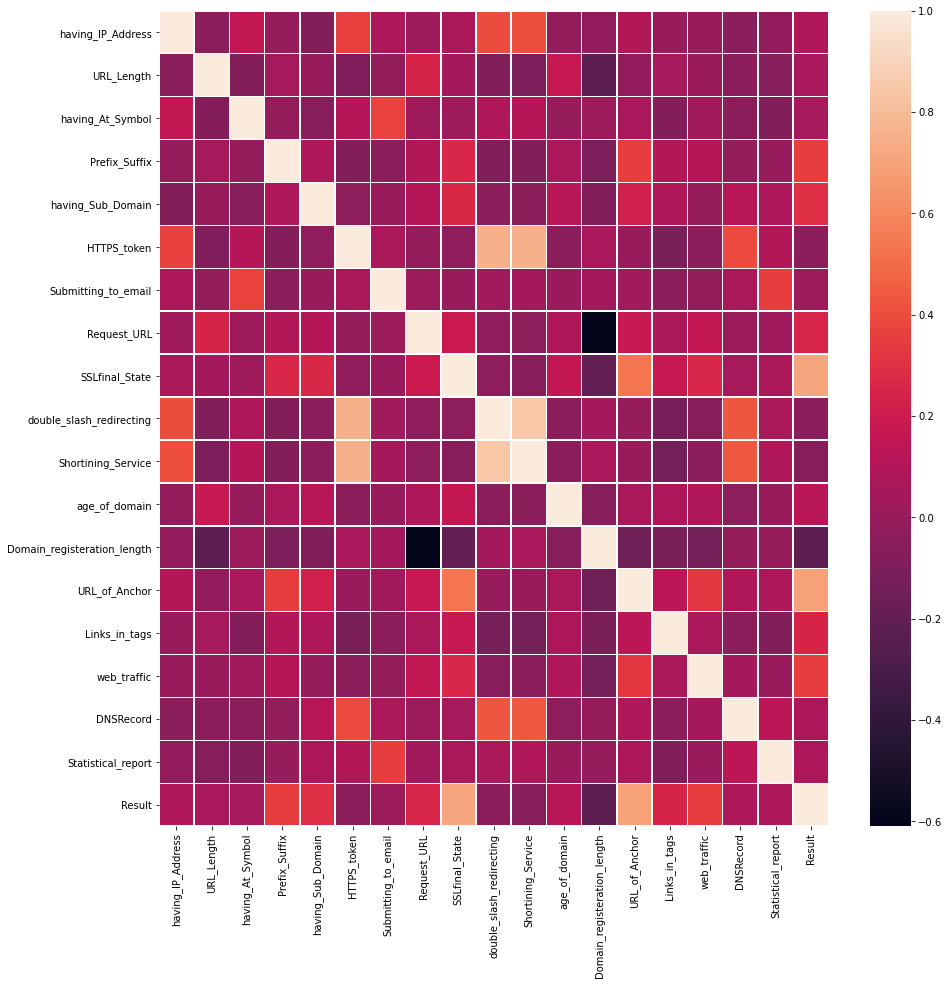

In [ ]:
plt.figure(figsize=(15, 15))
sns.heatmap(df.corr(), linewidths=.5)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


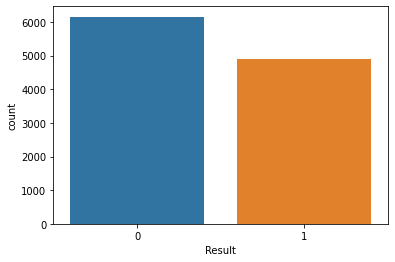

In [ ]:


import seaborn as sns
sns.countplot(df['Result'])



In [ ]:
print(df.corr()['Result'].sort_values())

Domain_registeration_length   -0.225789
Shortining_Service            -0.067966
HTTPS_token                   -0.039854
double_slash_redirecting      -0.038608
Submitting_to_email            0.018249
having_At_Symbol               0.052948
URL_Length                     0.057430
DNSRecord                      0.075718
Statistical_report             0.079857
having_IP_Address              0.094160
age_of_domain                  0.121496
Links_in_tags                  0.248229
Request_URL                    0.253372
having_Sub_Domain              0.298323
web_traffic                    0.346103
Prefix_Suffix                  0.348606
URL_of_Anchor                  0.692935
SSLfinal_State                 0.714741
Result                         1.000000
Name: Result, dtype: float64


In [ ]:
y = df['Result'].values
X = df.drop(['Result'], axis = 1)

from sklearn.metrics import accuracy_score,roc_curve,auc, confusion_matrix
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test  = train_test_split(X, y, test_size = 0.2, random_state = None)

In [ ]:
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg = logreg.fit(X_train,y_train)
prediction = logreg.predict(X_test)
print("Accuracy with Log Reg:", accuracy_score(y_test, prediction))
print ("Conf matrix Log Reg:",confusion_matrix(y_test,prediction))
print(f'Classification report: \n{classification_report(y_test, prediction)}')


Accuracy with Log Reg: 0.9235639981908639
Conf matrix Log Reg: [[1184   67]
 [ 102  858]]
Classification report: 
              precision    recall  f1-score   support

           0       0.92      0.95      0.93      1251
           1       0.93      0.89      0.91       960

    accuracy                           0.92      2211
   macro avg       0.92      0.92      0.92      2211
weighted avg       0.92      0.92      0.92      2211



In [ ]:
from sklearn.svm import SVC
svc_l = SVC(kernel = "linear", C = 0.025)
svc_l = svc_l.fit(X_train,y_train)
prediction = svc_l.predict(X_test)
print("Accuracy with SVM-Linear:",accuracy_score(y_test, prediction))
print("Conf matrix SVM-linear:",confusion_matrix(y_test,prediction))
print(f'Classification report: \n{classification_report(y_test, prediction)}')



Accuracy with SVM-Linear: 0.9199457259158752
Conf matrix SVM-linear: [[1185   66]
 [ 111  849]]
Classification report: 
              precision    recall  f1-score   support

           0       0.91      0.95      0.93      1251
           1       0.93      0.88      0.91       960

    accuracy                           0.92      2211
   macro avg       0.92      0.92      0.92      2211
weighted avg       0.92      0.92      0.92      2211



In [ ]:
from sklearn.ensemble import RandomForestClassifier
import pickle
rfc = RandomForestClassifier()
rfc = rfc.fit(X_train,y_train)
filename = 'rfc_phishing_model_2.sav'
pickle.dump(rfc, open(filename, 'wb'))
phishingModel = pickle.load(open("rfc_phishing_model_2.sav", 'rb'))
prediction = phishingModel.predict(X_test)
print("Accuracy with RF classifier:",accuracy_score(y_test, prediction))
print("Conf matrix RF classifier:",confusion_matrix(y_test,prediction))
print(f'Classification report: \n{classification_report(y_test, prediction)}')

Accuracy with RF classifier: 0.9624604251469923
Conf matrix RF classifier: [[1221   30]
 [  53  907]]
Classification report: 
              precision    recall  f1-score   support

           0       0.96      0.98      0.97      1251
           1       0.97      0.94      0.96       960

    accuracy                           0.96      2211
   macro avg       0.96      0.96      0.96      2211
weighted avg       0.96      0.96      0.96      2211



In [ ]:
from phishing import *
phishing_data = result("https://www.yahoo.com/")
#phishing_data = result("http://unauthorizd.newebpage.com/webapps/66fbf/")
print(phishing_data)
#1 legitimate
#0 phishing
phishing_data=np.array(phishing_data)
#phishing_data=phishing_data*-1
print(phishing_data.shape)
#phishing_data=[-1,	-1,	-1,	-1,	0,	-1,	-1,	-1,	-1,	-1,	-1,	-1,	-1,	0,	0,	-1,	-1,	-1]
phishing_pred= phishingModel.predict([phishing_data])
print(phishing_pred)

working Error trying to connect to socket: closing socket
[1, 1, 1, 1, -1, 1, -1, 1, -1, -1, 1, 0, 0, -1, 0, 1, 1, -1]
(18,)
[0]


In [ ]:
df['Result'].unique()

array([-1,  1])

In [ ]:
pip install python-whois

     |████████████████████████████████| 92kB 3.8MB/s 
  Created wheel for python-whois: filename=python_whois-0.7.3-cp37-none-any.whl size=87704 sha256=9d1a9297e8867ef05d5f1dee760ce517de3683e503bc31e077f3a287194388e2
  Stored in directory: /root/.cache/pip/wheels/12/3c/9b/901b7deea1fa960f9abfd84df82414dff215c4a1d6869bcea2
Successfully built python-whois
